<a href="https://colab.research.google.com/github/pauladel/DS3001-Project/blob/main/Data_Wrangling_EDA__unemployment_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/pauladel/DS3001-Project/refs/heads/main/raw-data/unemployment_per_state.csv',low_memory=False)

In [16]:
print( df.shape, '\n') # 29892 observations, 11 variables
print( df.head(), '\n')

(29892, 11) 

   FIPS Code  State/Area  Year  Month  \
0          1     Alabama  1976      1   
1          2      Alaska  1976      1   
2          4     Arizona  1976      1   
3          5    Arkansas  1976      1   
4          6  California  1976      1   

  Total Civilian Non-Institutional Population in State/Area  \
0                                       2,605,000             
1                                         232,000             
2                                       1,621,000             
3                                       1,536,000             
4                                      15,621,000             

  Total Civilian Labor Force in State/Area  \
0                             1,484,555      
1                               160,183      
2                               964,120      
3                               889,044      
4                             9,774,280      

   Percent (%) of State/Area's Population Total Employment in State/Area  \
0      

State/Area
West Virginia           7.970213
New York city           7.764007
Michigan                7.744149
Alaska                  7.721454
District of Columbia    7.526418
Los Angeles County      7.455319
Mississippi             7.348936
California              7.230496
Louisiana               7.010461
Illinois                6.850355
Alabama                 6.847340
Oregon                  6.847163
Washington              6.698936
Nevada                  6.696631
New Mexico              6.684752
Ohio                    6.602482
Kentucky                6.534397
New York                6.504610
Pennsylvania            6.389894
Rhode Island            6.385993
South Carolina          6.315957
New Jersey              6.251950
Tennessee               6.226773
Arizona                 6.218972
Arkansas                6.195390
Florida                 5.985816
Texas                   5.972340
Indiana                 5.925887
Georgia                 5.901064
North Carolina          5.790248

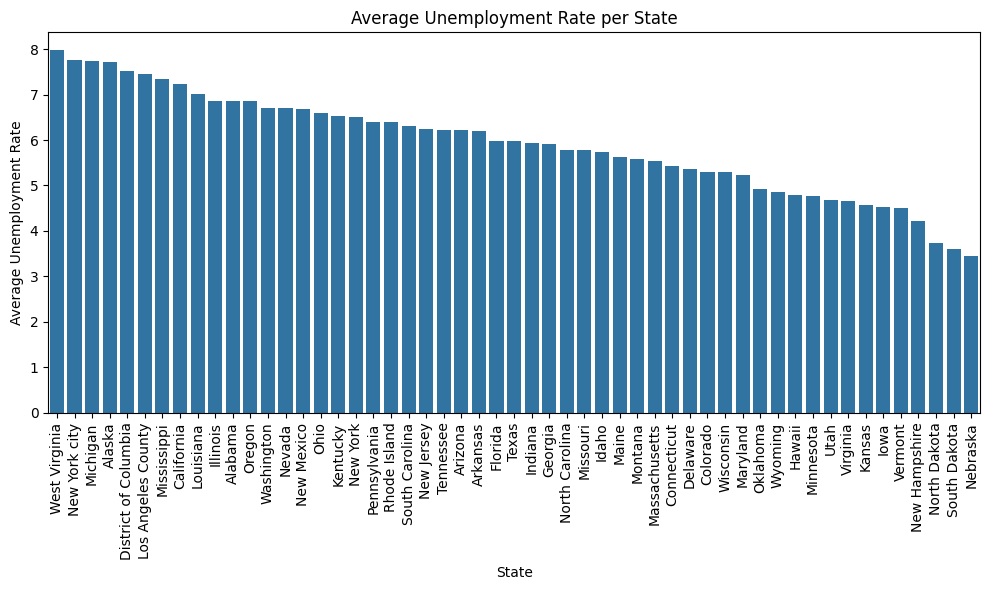

In [24]:
# Group by state and calculate the average unemployment rate for each state
average_unemployment = df.groupby('State/Area')['Percent (%) of Labor Force Unemployed in State/Area'].mean().sort_values(ascending=False)

# Display the average unemployment rates
print(average_unemployment)

# Plot the average unemployment rate for each state using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_unemployment.index, y=average_unemployment.values)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()
#This data is interesting, as it shows us which states have the highest unemployment rate. In comparing these tables to the ones with natural disasters, we will be able to see if there's any correlation

State/Area
California              1.142506e+06
Texas                   6.034898e+05
New York                5.788392e+05
Florida                 4.337868e+05
Illinois                4.195064e+05
Pennsylvania            3.810070e+05
Ohio                    3.640236e+05
Michigan                3.596317e+05
Los Angeles County      3.350133e+05
New York city           2.758656e+05
New Jersey              2.595772e+05
North Carolina          2.298575e+05
Georgia                 2.298313e+05
Washington              1.882574e+05
Massachusetts           1.819187e+05
Indiana                 1.757671e+05
Tennessee               1.655843e+05
Virginia                1.634371e+05
Missouri                1.589410e+05
Wisconsin               1.471661e+05
Arizona                 1.439109e+05
Maryland                1.418540e+05
Louisiana               1.376915e+05
Alabama                 1.353294e+05
Minnesota               1.239861e+05
Kentucky                1.218218e+05
South Carolina          1.1

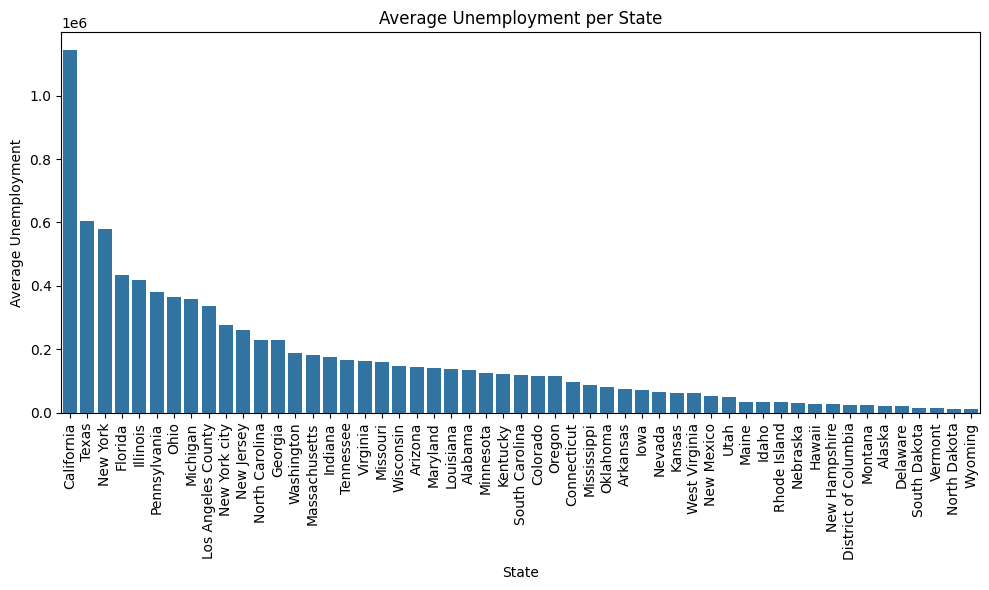

In [26]:
# Remove commas and convert 'Total Unemployment in State/Area' to numeric
df['Total Unemployment in State/Area'] = df['Total Unemployment in State/Area'].replace({',': ''}, regex=True)
df['Total Unemployment in State/Area'] = pd.to_numeric(df['Total Unemployment in State/Area'], errors='coerce')

# Group by state and calculate the average unemployment
average_unemployment = df.groupby('State/Area')['Total Unemployment in State/Area'].mean().sort_values(ascending=False)

# Display the average unemployment rates
print(average_unemployment)

# Plot the average unemployment rate for each state using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_unemployment.index, y=average_unemployment.values)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Average Unemployment')
plt.title('Average Unemployment per State')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything
plt.show()
#This data gives us a different look at the types of states with higher unemployment rates, purely from a total headcount perspective

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='Total Unemployment in State/Area'>

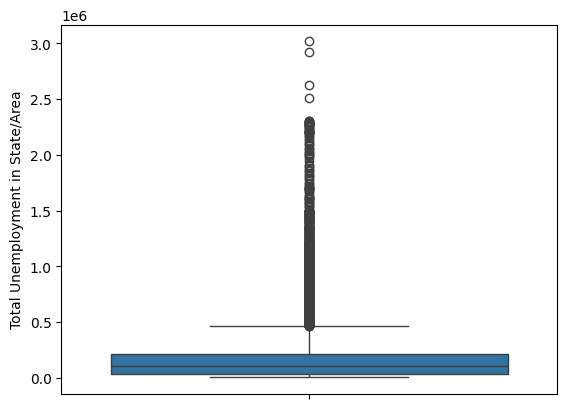

In [28]:
sns.boxplot(df['Total Unemployment in State/Area'])
#Was curious to see if there were a significant amount of outliers based on the table above. Clearly there are, though this probably isn't the best way to view this data

In [32]:
df['Total Unemployment in State/Area'].describe()
#sns.kdeplot(data=df,x='Total Unemployment in State/Area',hue='control')

,Total Unemployment in State/Area
count,2.989200e+04
mean,1.695473e+05
std,2.145427e+05
min,4.980000e+03
25%,3.737100e+04
50%,1.039425e+05
75%,2.102450e+05
max,3.018611e+06


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Total Unemployment in State/Area', ylabel='Density'>

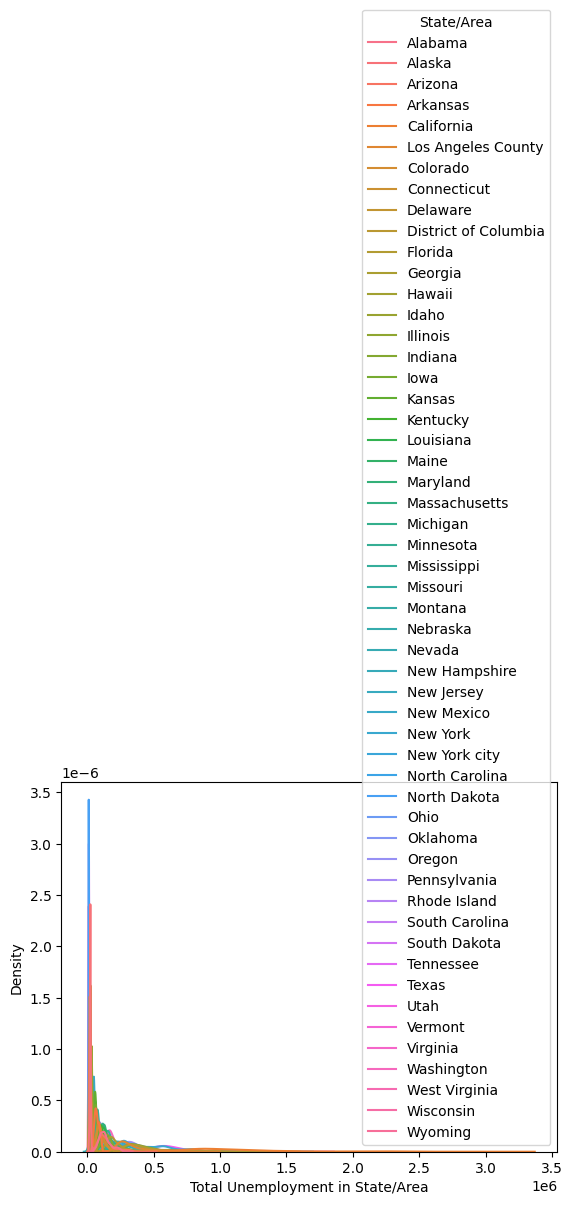

In [33]:
sns.kdeplot(data=df,x='Total Unemployment in State/Area',hue='State/Area')
# This is incredibly hard to read lol
#Unsure of quite how to clean this